In [1]:
import pandas as pd
import glob as glob
import matplotlib.pyplot as plt

In [2]:
paths = glob.glob('./data/data_sept_10/*-tmix_*')   #Los * indican lo que sea antes o despues segun donde esten colocados
paths

['./data/data_sept_10\\2016-04-tmix_hora_L1.csv',
 './data/data_sept_10\\2016-05-tmix_hora_L1.csv',
 './data/data_sept_10\\2016-09-tmix_hora_L1.csv',
 './data/data_sept_10\\2017-03-tmix_hora_L1.csv',
 './data/data_sept_10\\2017-08-tmix_hora_L1.csv',
 './data/data_sept_10\\2018-02-tmix_hora_L1.csv',
 './data/data_sept_10\\2019-03-tmix_hora_L1.csv',
 './data/data_sept_10\\2019-04-tmix_hora_L1.csv',
 './data/data_sept_10\\2019-07-tmix_hora_L1.csv',
 './data/data_sept_10\\2021-02-tmix_hora_L1.csv',
 './data/data_sept_10\\2021-03-tmix_hora_L1.csv',
 './data/data_sept_10\\2022-abr-tmix_hora_L1.csv',
 './data/data_sept_10\\2022-ago-tmix_hora_L1.csv',
 './data/data_sept_10\\2022-dic-tmix_hora_L1.csv',
 './data/data_sept_10\\2022-ene-tmix_hora_L1.csv',
 './data/data_sept_10\\2022-feb-tmix_hora_L1.csv',
 './data/data_sept_10\\2022-jul-tmix_hora_L1.csv',
 './data/data_sept_10\\2022-jun-tmix_hora_L1.csv',
 './data/data_sept_10\\2022-mar-tmix_hora_L1.csv',
 './data/data_sept_10\\2022-may-tmix_hora_

In [3]:
pd.read_csv(paths[0],
            skiprows=[0,1,2,3,4,5,7],
           encoding="ANSI",
           index_col=0, parse_dates=True)

,Temp_Avg,RH_Avg,WSpeed_Avg,WSpeed_Max,WDir_Avg,Rain_Tot,Press_Avg,Rad_Avg
TIMESTAMP,,,,,,,,
2016-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2016-04-30 19:00:00,30.94,11.76,0.745,NaN,176.2,0.0,NaN,41.5
2016-04-30 20:00:00,28.55,16.23,2.165,NaN,346.0,0.0,NaN,0.0
2016-04-30 21:00:00,26.20,18.60,2.970,NaN,324.5,0.0,NaN,0.0


In [4]:
def importa(f):
    tmx = pd.read_csv(f,
            skiprows=[0,1,2,3,4,5,7],
           encoding="ANSI",
           index_col=0, parse_dates=True)
    return tmx

In [5]:
tmx = pd.concat([importa(path) for path in paths],axis=0)
tmx.sort_index(inplace=True)
tmx.to_csv('./data/tmix_complete.csv')
tmx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14544 entries, 2016-04-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Temp_Avg    14094 non-null  float64
 1   RH_Avg      14094 non-null  float64
 2   WSpeed_Avg  14094 non-null  float64
 3   WSpeed_Max  11572 non-null  float64
 4   WDir_Avg    14094 non-null  float64
 5   Rain_Tot    14086 non-null  float64
 6   Press_Avg   12496 non-null  float64
 7   Rad_Avg     14093 non-null  float64
dtypes: float64(8)
memory usage: 1022.6 KB


In [6]:
len(paths)

20

<Axes: xlabel='TIMESTAMP'>

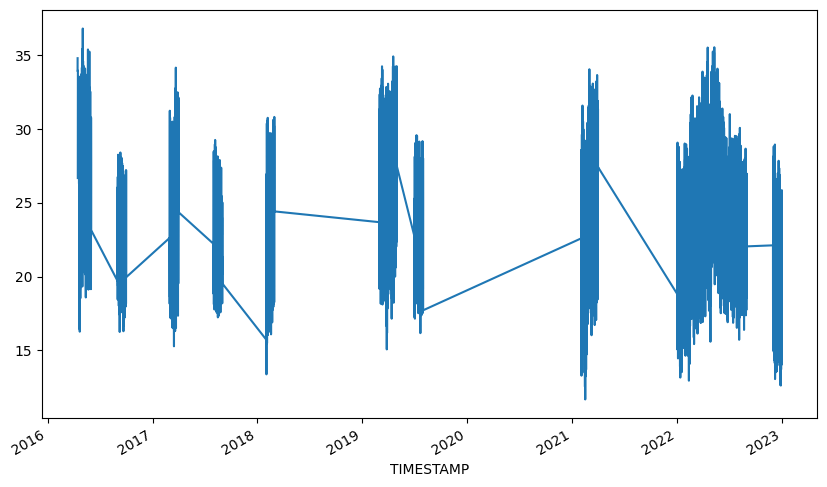

In [9]:
tmp = pd.read_csv("./data/tmix_complete.csv",
        index_col=0, parse_dates=True)
tmp.Temp_Avg.plot(figsize=(10, 6))